In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, make_scorer

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_sample_weight

# Modeling : Use Case 1 : Predict saleprice

In [2]:
df = pd.read_csv('uc1_dataset.csv')

In [3]:
df

,sub_ms_class,zoning_ms,frontge_lot,area_lot,alleyname,shape_lot,contour_land,configlot,slopeland,neighborhood,...,enclosedporch,poolqc,fence,miscfeature,mosold,yrsold,saletype,salecondition,saleprice,totalbathinhouse
0,1.584545,1.474430,-0.817973,-1.463736,0.252318,-0.747586,-0.015148,-0.310729,-0.134160,1.007975,...,0.0,0.144267,0.463139,0.231554,-0.119110,-0.614439,3.441295,3.313126,87000.0,-1.493355
1,1.584545,0.393320,0.633321,-0.013189,0.252318,-0.747586,-0.015148,0.067948,-0.134160,0.397744,...,0.0,0.144267,0.463139,0.231554,0.990891,-0.614439,-0.261902,-0.190298,175500.0,-0.861385
2,1.584545,0.393320,-1.108232,-1.201569,0.252318,1.247504,-0.015148,-0.310729,-0.134160,0.344376,...,0.0,0.144267,0.463139,0.231554,2.100892,0.891994,-0.261902,-0.190298,82500.0,-1.493355
3,0.045837,0.393320,-0.701870,0.071974,0.252318,-0.747586,-0.015148,-0.310729,-0.134160,0.272016,...,0.0,0.144267,0.463139,0.231554,0.990891,-1.367655,-0.261902,-0.816770,107000.0,-1.493355
4,0.045837,0.393320,-0.295507,-1.130044,0.252318,-0.747586,-0.015148,-0.310729,-0.134160,1.222792,...,0.0,0.144267,0.463139,0.231554,1.730892,0.138777,-0.261902,-0.190298,340037.5,1.034527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-1.007689,-2.219592,0.923580,0.280428,0.319493,-0.715748,0.060826,-0.078808,0.115530,-1.041910,...,0.0,0.911062,0.579238,0.484739,1.360892,0.891994,-0.203980,-0.101631,284000.0,1.034527
1456,-1.209198,0.437487,0.517217,0.137098,0.319493,-0.715748,0.060826,-0.148746,0.115530,-0.673834,...,0.0,0.911062,0.579238,0.484739,-1.229111,-1.367655,-0.203980,-0.101631,162900.0,0.402557
1457,0.114336,0.437487,2.229744,1.811964,0.319493,-0.715748,0.060826,-0.148746,0.115530,-0.673834,...,0.0,0.911062,0.579238,0.484739,-0.119110,0.891994,-0.203980,-0.101631,260000.0,1.034527
1458,-1.007689,0.437487,1.387994,0.678410,0.319493,1.346912,-2.913864,-0.148746,0.115530,-1.105291,...,0.0,0.911062,0.579238,0.484739,1.730892,-0.614439,-0.203980,-0.101631,318000.0,1.034527


## PCA : Principal Component Analysis

In [4]:
# Split the data
X = df.drop(columns=['saleprice'])
y = df['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
pca = PCA()
pca.fit(X_train)

PCA()

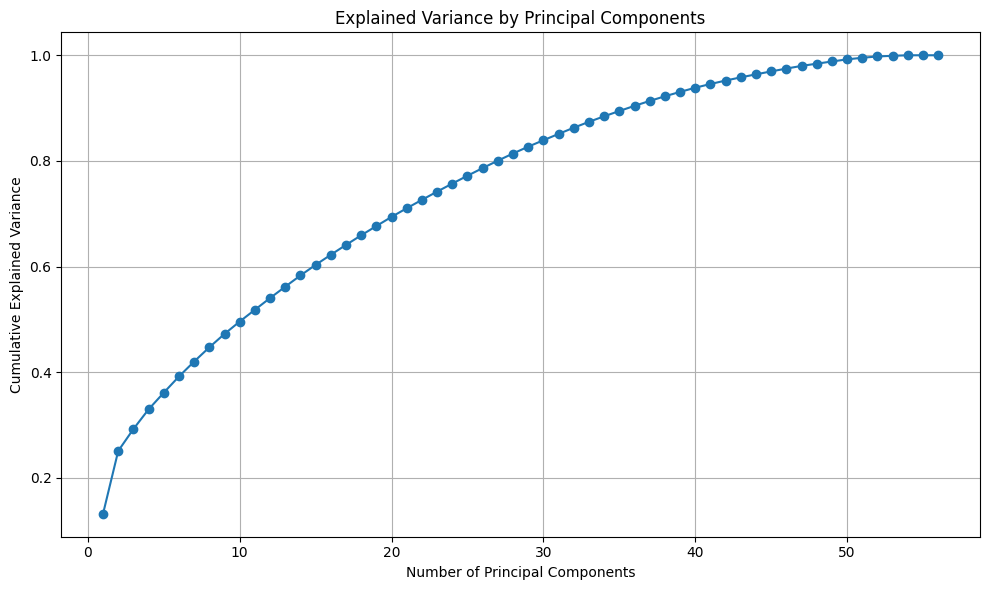

In [6]:
# Plot

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Apply PCA to retain 80% of the variance
pca = PCA(n_components=0.80)
X_train_pca = pca.fit_transform(X_train)

# Number of components selected
print(f"Number of components selected: {pca.n_components_}")

Number of components selected: 27


In [8]:
X_train_pca

array([[ 1.25020908, -4.80997629,  1.43147775, ..., -0.26027612,
         0.37864847,  0.93645348],
       [ 3.47617435,  2.40084138, -0.42601946, ..., -0.10123165,
        -0.68871972, -0.03553293],
       [-1.64186575,  2.3512142 , -1.07258401, ..., -0.08906798,
         0.32911659, -0.66542073],
       ...,
       [-2.54837081, -3.17538671, -1.50934765, ..., -1.44304599,
         1.43848528, -0.53774442],
       [ 3.25339785, -0.53114236, -0.35086996, ...,  0.38721673,
        -0.42920882, -0.62282018],
       [-1.97233917, -1.17832819, -0.02079206, ...,  0.0366694 ,
        -0.23731895,  0.43610746]], shape=(1168, 27))

In [9]:
X_test_pca = pca.transform(X_test)

The goal is to use a model that:
- Is not sensitive to linear relationships between variables
- Handles ordinal or encoded numeric data well
- Tolerates target-encoded columns

I will use LightGBM

### Metrics choice 

Chosen metrics for evaluation : RMSE and R²

In this use case, the goal is to predict the sale price of properties, which is a continuous numerical variable. From a business perspective, accurate price prediction is crucial for:

- Proper property valuation

- Revenue forecasting

- Market analysis and benchmarking

- Investment and risk assessment

Choice of metrics : 

- RMSE penalizes larger errors more heavily, which is especially important in a pricing context.

- A large deviation in predicted price can lead to mispricing, affecting profitability or customer trust.

>> It gives an interpretable value in the same unit as the target (i.e., currency), which helps stakeholders understand how far off predictions are, on average.

- R² indicates how much of the variance in sale prices is explained by the model.

- A higher R² means the model captures more of the underlying patterns in the data — crucial for business stakeholders to trust the model’s predictive power.

>> These metrics help evaluate both accuracy and explanatory power, which are vital when making financial decisions based on predicted prices.

## Model 1: LightGBM - Original data (no PCA, no target standardization)

In [10]:
model1 = lgb.LGBMRegressor(random_state=42)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
r2_1 = r2_score(y_test, y_pred1)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2474
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 54
[LightGBM] [Info] Start training from score 177530.675942


## Model 2: LightGBM - With PCA applied to X

In [11]:
model2 = lgb.LGBMRegressor(random_state=42)
model2.fit(X_train_pca, y_train)
y_pred2 = model2.predict(X_test_pca)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2 = r2_score(y_test, y_pred2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 27
[LightGBM] [Info] Start training from score 177530.675942


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


We can see that RMSE is too big, there are big differences between the predicted prices and true prices.
This can be because of the presence of some outliers, the target variable is not standardize.
Let's standardize the variable saleprice :


## Model 3: LightGBM - No PCA, but target 'saleprice' standardized

In [12]:
scaler_target = StandardScaler()

df_scaled_target = df.copy()

df_scaled_target['saleprice'] = scaler_target.fit_transform(df[['saleprice']])

X3 = df_scaled_target.drop(columns=['saleprice'])
y3 = df_scaled_target['saleprice']

In [13]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
model3 = lgb.LGBMRegressor(random_state=42)
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)
rmse3 = np.sqrt(mean_squared_error(y_test3, y_pred3))
r2_3 = r2_score(y_test3, y_pred3)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2474
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 54
[LightGBM] [Info] Start training from score 0.002964


## Model 4: LightGBM - Tuned hyperparameters (on standardized target, no PCA)

In [14]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y3, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor(random_state=42)

param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [10, 20]
}

rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid,
                           scoring=rmse_scorer, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train4, y_train4)

print("Meilleurs hyperparamètres :", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred4 = best_model.predict(X_test4)

rmse4 = np.sqrt(mean_squared_error(y_test4, y_pred4))
r2_4 = r2_score(y_test4, y_pred4)

print("\n=== Performance Tuned (Model 4) ===")
print(f"RMSE : {rmse4:.2f}")
print(f"R²   : {r2_4:.4f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2474
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 54
[LightGBM] [Info] Start training from score 0.002964
Meilleurs hyperparamètres : {'learning_rate': 0.01, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 500, 'num_leaves': 31}

=== Performance Tuned (Model 4) ===
RMSE : 0.35
R²   : 0.8634


## Performance comparaison

In [15]:
results = pd.DataFrame({
    "Model": [
        "1. Without PCA, saleprice brut",
        "2. With PCA, saleprice brut",
        "3. Without PCA, saleprice standardized",
        "4. Tuned (Without PCA, saleprice standardized)"
    ],
    "RMSE": [rmse1, rmse2, rmse3, rmse4],
    "R²": [r2_1, r2_2, r2_3, r2_4]
})

# Affichage propre
print("\n=== Performance Comparaison ===")
display(results.style.set_caption("Comparaison betwenn LightGBM models").format({"RMSE": "{:.4f}", "R²": "{:.4f}"}))


=== Performance Comparaison ===


,Model,RMSE,R²
0,"1. Without PCA, saleprice brut",24546.0674,0.8531
1,"2. With PCA, saleprice brut",26723.7323,0.8259
2,"3. Without PCA, saleprice standardized",0.3654,0.8531
3,"4. Tuned (Without PCA, saleprice standardized)",0.3524,0.8634


C:\Users\hp\AppData\Local\Temp\ipykernel_28008\1100297018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R²", data=results, palette="Greens_d")


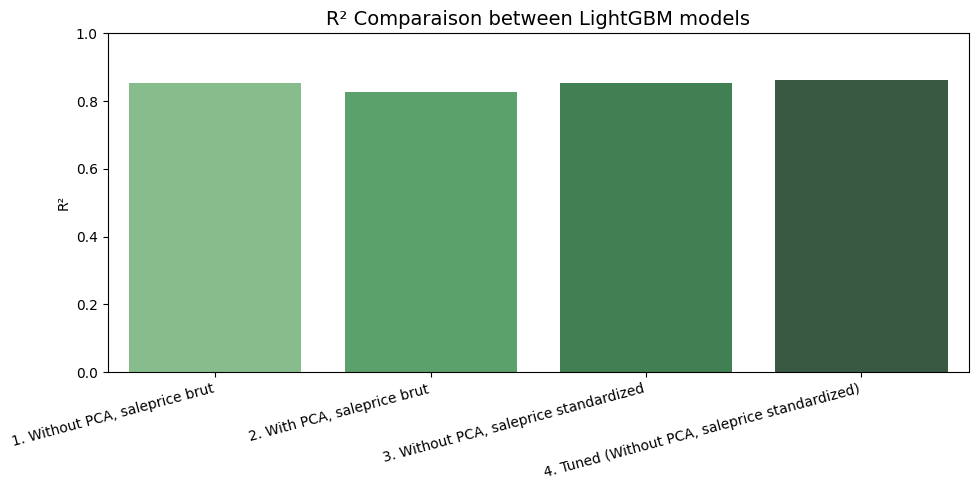

In [16]:
# R² Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="R²", data=results, palette="Greens_d")
plt.title("R² Comparaison between LightGBM models", fontsize=14)
plt.ylabel("R²")
plt.xlabel("")
plt.ylim(0, 1)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_28008\2668211471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_4.head(20), palette='crest')


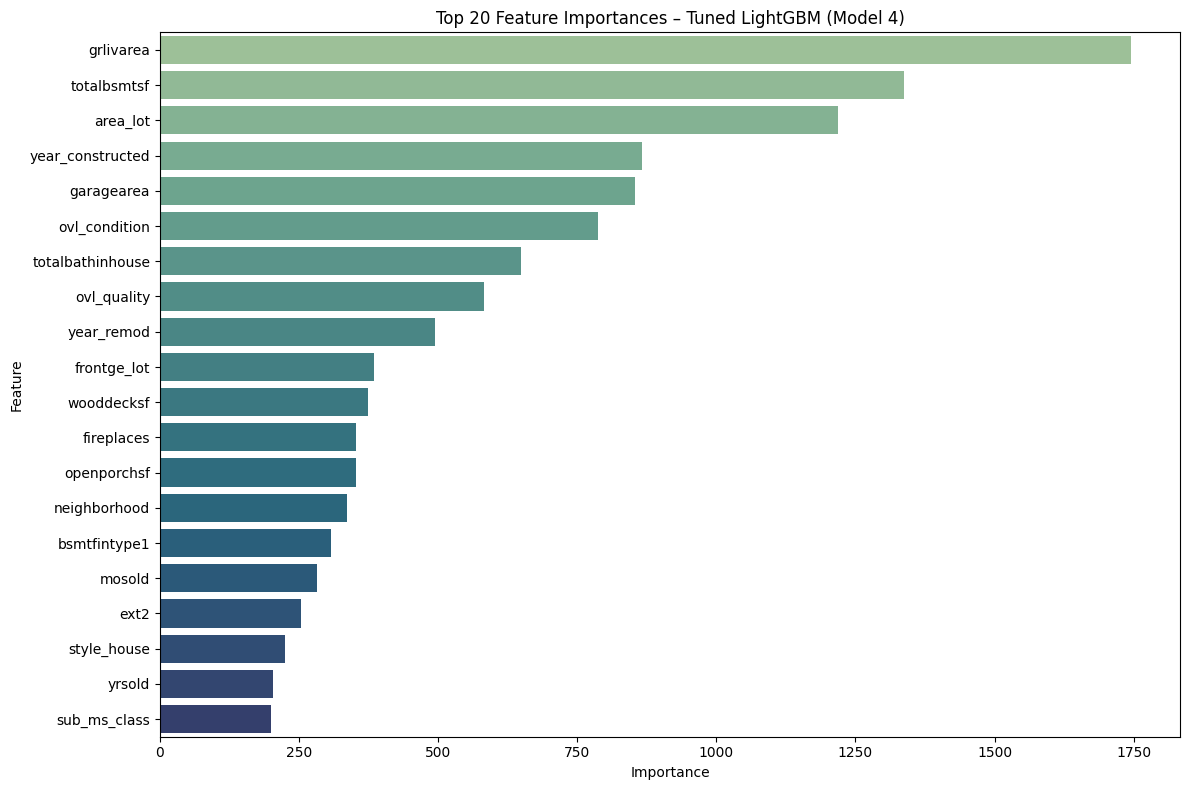

,Feature,Importance
34,grlivarea,1746
30,totalbsmtsf,1337
3,area_lot,1218
15,year_constructed,866
42,garagearea,853
14,ovl_condition,787
55,totalbathinhouse,649
13,ovl_quality,582
16,year_remod,495
2,frontge_lot,385


In [17]:
feature_importances_4 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_4.head(20), palette='crest')
plt.title("Top 20 Feature Importances – Tuned LightGBM (Model 4)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

feature_importances_4.head(30)

Based on the trained and tuned LightGBM model, the following features were found to be most influential in predicting the standardized SalePrice of houses:

Top Structural and Size Features
- grlivarea (Above-ground living area): This is the most important feature, as the total livable space in a house directly affects its value.

- totalbsmtsf (Total basement area): Larger basements add usable space and contribute significantly to home value.

- garagearea (Garage size): A larger garage often adds both functional and resale value.

- area_lot (Lot size): Bigger lots can increase value, especially in suburban areas.

- year_constructed & year_remod: Homes built or renovated more recently tend to be in better condition and have more modern features, increasing their value.

- ovl_quality (Overall quality) : This subjective evaluation of the house’s build and upkeep is strong predictor of price.

Conclusion : 

The model's importance rankings make sense and align well with domain knowledge in real estate. It effectively prioritizes living area, quality, location, and structural features — all key factors buyers and appraisers consider when determining home value.

# Modeling : Use case 2 : Predict saletype

Here, we have a classification problem.

In [18]:
# import the dataset

df2 = pd.read_csv('uc2_dataset.csv')

In [19]:
df2

,frontge_lot,area_lot,ovl_quality,ovl_condition,year_constructed,year_remod,masvnrarea,exterqual,extercond,bsmtqual,...,miscfeature_Gar2,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,saletype
0,55.0,4388.0,5,7,1930,1950,0.0,3,4,3,...,False,False,False,False,False,False,False,True,False,8
1,80.0,9600.0,7,6,1973,1973,320.0,3,3,3,...,False,False,False,False,False,False,False,True,False,8
2,50.0,5330.0,4,7,1940,1950,0.0,2,3,3,...,False,False,False,False,False,False,False,True,False,8
3,57.0,9906.0,4,4,1925,1950,0.0,3,3,3,...,False,False,False,False,False,False,True,False,False,8
4,64.0,5587.0,8,5,2008,2008,186.0,5,3,5,...,False,False,False,False,False,False,False,False,True,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,85.0,10655.0,8,5,2003,2004,296.0,4,3,4,...,False,False,False,False,False,False,False,True,False,8
1456,78.0,10140.0,7,5,1976,1976,0.0,3,3,4,...,False,False,False,False,False,False,False,True,False,8
1457,107.5,16158.0,7,5,2005,2005,16.0,4,3,5,...,False,False,False,False,False,False,False,True,False,8
1458,93.0,12085.0,8,5,2007,2007,328.0,4,3,5,...,False,False,False,False,False,False,False,False,True,6


### Metrics choice

Chosen metric: F1 Score (Weighted)

This use case focuses on predicting the type of sale (SaleType), a categorical variable with multiple classes such as standard sales, new house sales, or other types.

From a business standpoint, correctly identifying the sale type is important for:

- Customizing sales strategies

- Understanding customer segments

- Forecasting operational workflows

- Identifying atypical or special sales conditions

Metric choice :

- The classes are imbalanced — for example, standard sales (WD) are much more frequent than rare types.

- Accuracy alone would be misleading, as it could be high even if the model fails to predict rare but important classes.

- The weighted F1 score considers both precision and recall, and it adjusts for the support (number of true instances) of each class.

This helps ensure the model performs well across all classes, especially the minority ones which may be critical from a business or compliance perspective.

>> Summary: The weighted F1 score ensures balanced performance and prevents the model from ignoring less frequent but business-relevant sale types.

## Model 1: Random Forest Classifier With Class Weights

In [20]:
# Train-test split
X = df2.drop('saletype', axis=1)  # Dropping target column
y = df2['saletype']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Performance evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Print classification report
print("\nModel 1: Random Forest Classifier With Class Weights")
print(classification_report(y_test, y_pred_rf))


Model 1: Random Forest Classifier With Class Weights
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.96      1.00      0.98        26
           7       0.00      0.00      0.00         2
           8       0.94      1.00      0.97       248

    accuracy                           0.94       292
   macro avg       0.24      0.25      0.24       292
weighted avg       0.88      0.94      0.91       292



c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Let's reminde that, this is the mapping done : 
- WD --> 8
- Oth --> 7
- New --> 6
- ConLW --> 5
- ConLI --> 4
- ConLD --> 3 
- Con --> 2
- CWD --> 1
- COD --> 0

Interpretation of the scores:

Only classes 6 and 8 (New and WD) are well classified:

Precision ≈ 0.95–0.96

Recall = 1.00 (almost no false negatives)

All other classes (0 to 5, 7) are completely ignored by the model (precision and recall = 0), even with class_weight='balanced'.

The model has learned to only predict the majority classes because :
- Rare classes (1, 2, 3 ..) are underrepresented.
- Even class_weight = 'balanced' that we added is not enough to make the model learn from such few examples.

Solution : 

- We will try to combine rare classes and compare the results

## Model 2 : Random Forest Classifier After grouping classes

In [21]:
def regroup_saletype(val):
    if val == 8:      # WD (standard sale)
        return 8
    elif val == 6:    # New (new house sale)
        return 6
    else:             # All others, including Oth (7) and minor classes (0–5)
        return 1

# Apply the reclassification
df2['saletype'] = df2['saletype'].apply(regroup_saletype)

In [22]:
df2['saletype'].value_counts()

saletype
8    1267
6     122
1      71
Name: count, dtype: int64

In [23]:
# Train-test split
X = df2.drop('saletype', axis=1)
y = df2['saletype']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier again
model_rf2 = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf2.fit(X_train, y_train)

# Make predictions
y_pred_rf2 = model_rf2.predict(X_test)

# Performance evaluation
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)
rf2_report = classification_report(y_test, y_pred_rf2, output_dict=True)

# Print classification report
print("\nModel 2: Random Forest Classifier With Grouped Classes")
print(classification_report(y_test, y_pred_rf2))


Model 2: Random Forest Classifier With Grouped Classes
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           6       0.96      1.00      0.98        26
           8       0.94      1.00      0.97       248

    accuracy                           0.94       292
   macro avg       0.63      0.67      0.65       292
weighted avg       0.88      0.94      0.91       292



c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

## Model 3 : XGBoost With grouped classes

In [24]:
# Remapping labels for XGBoost
y_mapped = y.map({1: 0, 6: 1, 8: 2})  # Mapping for 3 classes
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Performance evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)

# Print classification report
print("\nModel 3: XGBoost With Grouped Classes")
print(classification_report(y_test, y_pred_xgb))


Model 3: XGBoost With Grouped Classes
              precision    recall  f1-score   support

           0       0.50      0.06      0.10        18
           1       0.93      1.00      0.96        26
           2       0.94      0.99      0.96       248

    accuracy                           0.93       292
   macro avg       0.79      0.68      0.68       292
weighted avg       0.91      0.93      0.91       292



On remarque que la classe 1 est prédite beaucoup mieux avec XGBoost qu'avec Random Forest

On va essayer le RandomOverSampling

## Model 4 : XGBoost With grouped classes and RandomOverSampler

In [25]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize and fit the XGBoost model with resampling
model_xgb_resampled = XGBClassifier(objective='multi:softmax', num_class=3, learning_rate=0.1, max_depth=7,
                                    n_estimators=100, colsample_bytree=0.8, subsample=1, random_state=42)
model_xgb_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb_resampled = model_xgb_resampled.predict(X_test)

# Performance evaluation
accuracy_xgb_resampled = accuracy_score(y_test, y_pred_xgb_resampled)
xgb_resampled_report = classification_report(y_test, y_pred_xgb_resampled, output_dict=True)

# Print classification report
print("\nModel 4: XGBoost With Grouped Classes and RandomOverSampler")
print(classification_report(y_test, y_pred_xgb_resampled))


Model 4: XGBoost With Grouped Classes and RandomOverSampler
              precision    recall  f1-score   support

           0       0.75      0.17      0.27        18
           1       0.93      1.00      0.96        26
           2       0.95      0.99      0.97       248

    accuracy                           0.94       292
   macro avg       0.87      0.72      0.73       292
weighted avg       0.93      0.94      0.93       292



## Model 5 : XGBoost With fine-tuning

In [26]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(estimator=XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', random_state=42),
                           param_grid=param_grid, scoring='f1_weighted', cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

# Best model from grid search
best_xgb = grid_search.best_estimator_

# Make predictions
y_pred_best_xgb = best_xgb.predict(X_test)

# Performance evaluation
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
best_xgb_report = classification_report(y_test, y_pred_best_xgb, output_dict=True)

# Print classification report
print("\nModel 5: XGBoost With Fine-Tuning")
print(classification_report(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 72 candidates, totalling 216 fits

Model 5: XGBoost With Fine-Tuning
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        18
           1       0.93      1.00      0.96        26
           2       0.95      1.00      0.97       248

    accuracy                           0.95       292
   macro avg       0.96      0.72      0.74       292
weighted avg       0.95      0.95      0.93       292



## Model 6 : Cross Validation to avoid Over-fitting

In [27]:
# Cross-validation with the fine-tuned model
cv_scores = cross_val_score(best_xgb, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print cross-validation results
print("\nModel 6: Cross Validation to Avoid Overfitting")
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {np.mean(cv_scores)}")


Model 6: Cross Validation to Avoid Overfitting
Cross-validation scores: [0.99836601 0.99346405 0.99345336 0.99509002 0.99345336]
Average cross-validation score: 0.9947653584074109


## Performance Comparaison

In [28]:
# Create a DataFrame to compare model accuracies
results = pd.DataFrame({
    "Model": [
        "1. RF With Class Weights",
        "2. RF With Grouped Classes",
        "3. XGBoost With Grouped Classes",
        "4. XGBoost With Grouped Classes and RandomOverSampler",
        "5. XGBoost With Fine-Tuning",
    ],
    "F1 Score (Weighted)": [
        rf_report["weighted avg"]["f1-score"],
        rf2_report["weighted avg"]["f1-score"],
        xgb_report["weighted avg"]["f1-score"],
        xgb_resampled_report["weighted avg"]["f1-score"],
        best_xgb_report["weighted avg"]["f1-score"],
    ]
})

# Display the comparison table
print("\n=== Comparaison des performances des modèles ===")
display(results.style.set_caption("Tableau comparatif des modèles de classification").format({"F1 score (weighted)": "{:.4f}"}))


=== Comparaison des performances des modèles ===


,Model,F1 Score (Weighted)
0,1. RF With Class Weights,0.908531
1,2. RF With Grouped Classes,0.908531
2,3. XGBoost With Grouped Classes,0.911247
3,4. XGBoost With Grouped Classes and RandomOverSampler,0.925120
4,5. XGBoost With Fine-Tuning,0.927642


In [29]:
# Retrieve feature importances
importances = best_xgb.feature_importances_
feature_names = X.columns  

# Create a sorted DataFrame of importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [30]:
print("\n=== Feature Importance (best_xgb) ===")
print(feature_importance_df.to_string(index=False))


=== Feature Importance (best_xgb) ===
              Feature  Importance
salecondition_Partial    0.108520
     foundation_PConc    0.091561
 salecondition_Normal    0.047764
 type_building_2fmCon    0.031045
              c1_PosN    0.021124
         ext2_HdBoard    0.020298
 neighborhood_OldTown    0.018864
 neighborhood_Blueste    0.017651
     year_constructed    0.016839
     bsmtfintype2_GLQ    0.014232
 neighborhood_BrkSide    0.013554
 neighborhood_Gilbert    0.013245
     bsmtfintype2_ALQ    0.013203
      bsmtexposure_Gd    0.012532
         ext1_HdBoard    0.012364
 neighborhood_Mitchel    0.012250
      sub_ms_class_60    0.010708
       alleyname_Grvl    0.010526
 neighborhood_NoRidge    0.010444
 neighborhood_Crawfor    0.010346
          fence_GdPrv    0.010169
         ext2_Wd Sdng    0.010125
    foundation_CBlock    0.010011
           year_remod    0.009899
         ext1_CemntBd    0.009386
 salecondition_Family    0.009380
 neighborhood_ClearCr    0.008569
      bsm

C:\Users\hp\AppData\Local\Temp\ipykernel_28008\2410079906.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')


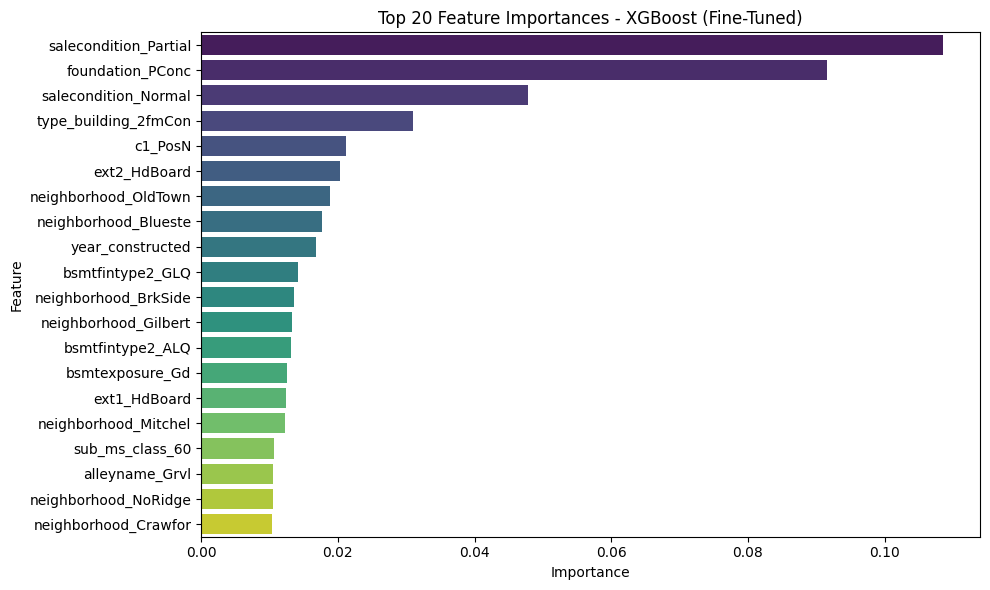

In [31]:
# Set the figure size
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')

# Add title and axis labels
plt.title('Top 20 Feature Importances - XGBoost (Fine-Tuned)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Interpretation of Feature Importances

The bar chart above shows the top 20 most important features used by the fine-tuned XGBoost classifier in predicting the saletype classes.

Top features:

- salecondition_Partial is by far the most influential feature, indicating that properties sold under a "Partial" sale condition significantly impact classification.

- foundation_PConc and salecondition_Normal follow, suggesting that the foundation type and general sale condition are also strong predictors.

- Neighborhoods and structure-related features also play a key role:

- Features like neighborhood_OldTown, neighborhood_Blueste, and neighborhood_BrkSide show that the property's location is an important factor.

- Structural features such as type_building_2fmCon, year_constructed, bsmtfintype2_GLQ, and bsmtfintype2_ALQ reflect how the build type and basement finishing types contribute to the model's decision.

The importance values are normalized and reflect each feature's contribution to the predictive power of the model. Higher values indicate a greater role in reducing classification error during training.

In summary, the model places high importance on sale condition, foundation type, and building/neighborhood characteristics, which aligns with domain expectations in real estate transactions.